In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.dropna(inplace=True)

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

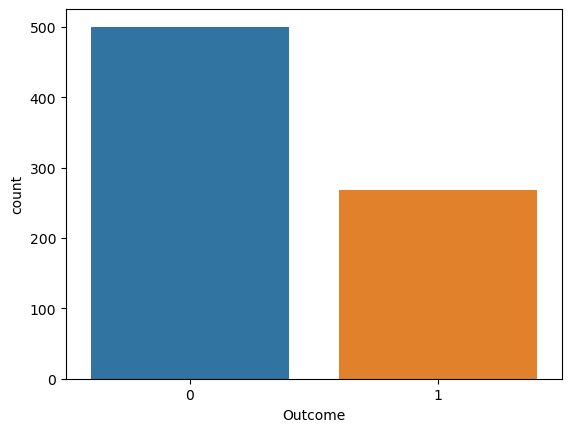

In [9]:
sns.countplot(data=df, x="Outcome")
plt.show()

In [10]:
X = df.drop('Outcome',axis = 1)
y = df['Outcome']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
model = LogisticRegression(solver='newton-cg', max_iter=10000, n_jobs=-1, class_weight={0: 0.15, 1:0.85})
model.fit(X_train, y_train)

LogisticRegression(class_weight={0: 0.15, 1: 0.85}, max_iter=10000, n_jobs=-1,
                   solver='newton-cg')

In [14]:
pred_test = model.predict(X_test)
pred_train = model.predict(X_train)

In [15]:
print(confusion_matrix(y_test, pred_test))
print(confusion_matrix(y_train, pred_train))

[[69 82]
 [ 6 74]]
[[174 175]
 [  9 179]]


In [16]:
print(accuracy_score(y_test, pred_test))

print(accuracy_score(y_train, pred_train))

0.6190476190476191
0.6573556797020484


In [17]:
print(metrics.classification_report(y_test, pred_test))

print(metrics.classification_report(y_train, pred_train))

<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

           0       0.92      0.46      0.61       151
           1       0.47      0.93      0.63        80

    accuracy                           0.62       231
   macro avg       0.70      0.69      0.62       231
weighted avg       0.77      0.62      0.62       231



<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

           0       0.95      0.50      0.65       349
           1       0.51      0.95      0.66       188

    accuracy                           0.66       537
   macro avg       0.73      0.73      0.66       537
weighted avg       0.79      0.66      0.66       537



In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
clf = DecisionTreeClassifier(max_depth=7, min_samples_split=10, random_state=42)

In [22]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_split=10, random_state=42)

In [23]:
pred_test = clf.predict(X_test)
pred_train = clf.predict(X_train)

In [28]:
print("test accuracy :",accuracy_score(y_test, pred_test))

print("train accuracy :",accuracy_score(y_train, pred_train))

test accuracy : 0.696969696969697
train accuracy : 0.888268156424581


In [32]:
print('Test classification report')
print(metrics.classification_report(y_test, pred_test))
print('Train classification report')
print(metrics.classification_report(y_train, pred_train))

Test classification report


<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

           0       0.77      0.76      0.77       151
           1       0.56      0.57      0.57        80

    accuracy                           0.70       231
   macro avg       0.67      0.67      0.67       231
weighted avg       0.70      0.70      0.70       231

Train classification report


<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       349
           1       0.84      0.84      0.84       188

    accuracy                           0.89       537
   macro avg       0.88      0.88      0.88       537
weighted avg       0.89      0.89      0.89       537

